# TD 4 | Étude des vibrations des aubes d'un rouet de compresseur d'un turbofan

---

Objectifs du TD :

* pratiquer sur un use case concret d'analyse statistique de données de production aéronautiques
* PCA
* tests statistiques et coefficients de corrélation

---

## Présentation du problème

On considère le **rouet de compresseur** de la **turbine à gaz d'un turbopropulseur** d'hélicoptère. Celui-ci est constitué de 13 **aubes**.

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/turbo-helico.png?raw=1" />

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/compresseur.png?raw=1" /> <img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/compresseur-2.png?raw=1" />

En production, après la fabrication et montage de la pièce, on mesure les vibrations des aubes grâce à une technique appelée **tip-timing**. Cette technique consiste à mesurer la position d'une aube en rotation par rapport à sa position au repos. En effet, les vibrations dues à la rotation entraînent un **décalage de la position des aubes** (voir schéma ci-dessous).

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/tiptiming.png?raw=1"/>

La mesure de ce déplacement maximal à un régime (vitesse de rotation) donné permet de déduire le niveau vibratoire de chacune des aubes. Voici les résultats obtenus pour chacune des 13 aubes :

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/vibrations.png?raw=1" />

<div style="color: #bb1111; font-size: 16px; background-color: #ffeeee; padding: 20px; border-radius: 15px">
    <p><b>Problème :</b> on observe un niveau de vibrations anormal pour l'aube numérotée 11 dans le tableau ci-dessus (déplacement maximal de 0.99 mm). Cependant, il est impossible d'identifier de manière certaine cette aube, car l'aube n°1 n'est pas identifiée : il peut y avoir un décalage circulaire des mesures. On sait seulement qu'une aube vibre davantage que les autres. Comment peut-on identifier cette aube afin de la remplacer ?</p>
</div>

## Présentation des données

<div style="color: #1111bb; font-size: 16px; background-color: #eeeeff; padding: 20px; border-radius: 15px">
    <p>On dispose de données de production sur les aubes de ce compresseur !</p>
</div>

Durant la production, de nombreuses caractéristiques géométriques de chaque aube sont mesurées. Ces données géométriques sont les suivantes :

* 17 variables géométriques concernant la forme (bord d'attaque BA, bord de fuite BF, etc.) de l'aube
* 94 variables d'épaisseurs mesurées à différents points de l'aube

soit un total de 111 variables mesurées par aube. Ces données se trouvent dans le fichier `Rouet_geometries.csv` (voir figures ci-dessous).

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/geometries.png?raw=1" />
<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/epaisseurs.png?raw=1" />

Enfin, les données de vibrations issues du tip-timing se trouvent dans le fichier `Rouet_vibrations.csv`.

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/vibrations.png?raw=1" />

<div style="color: #1111bb; font-size: 16px; background-color: #eeeeff; padding: 20px; border-radius: 15px">
    <p><b>Attention :</b> Les numérotations des aubes dans les données géométriques et les résultats du tip-timing ne sont pas les mêmes (permutation circulaire) !</p>
</div>

## 1. Chargement et préparation des données

### 1.1 Lecture des données

Charger les deux jeux de données, géométries (`./data/Rouet_geometries.csv`) et vibrations (`./data/Rouet_vibrations.csv`), dans des DataFrames pandas. Il sera nécessaire de prêter attention au format des fichier (header, séparateur de colonnes, typage des colonnes, etc.).

**Indice** : l'encodage des fichier CSV n'est pas UTF-8, il faudra donc préciser l'option `encoding='latin'` à la fonction `pandas.read_csv`.

In [5]:
import pandas as pd
import numpy as np

In [6]:


# Lecture depuis ton dépôt GitHub
url_geo = "https://raw.githubusercontent.com/oumarmagassa/TDs-statistiques-descriptives/main/TD4/Rouet_geometries.csv"
url_vib = "https://raw.githubusercontent.com/oumarmagassa/TDs-statistiques-descriptives/main/TD4/Rouet_vibrations.csv"




In [7]:
geometries = pd.read_csv(url_geo, encoding='latin', sep=';', decimal=',', skiprows=1)

In [8]:
print("Aperçu des données géométriques :")
display(geometries.head())

Aperçu des données géométriques :


,Unnamed: 0,Défaut de forme - Rayon de arccordement,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Rayon de raccordement (mm),Unnamed: 8,Unnamed: 9,...,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111
0,N° Pale,BA in,MI in,BF intra,BA ex,MI Ex,BF ex,BA in,MI in,BF intra,...,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0
1,1,"0,077","0,064","0,047","0,054","0,035","0,053","4,43","2,03","1,95",...,121.0,151.0,140.0,143.0,161.0,168.0,180.0,175.0,182.0,194.0
2,2,"0,068","0,073","0,059","0,056","0,039","0,053","4,44","2,02","1,95",...,129.0,155.0,149.0,148.0,172.0,176.0,187.0,185.0,190.0,197.0
3,3,"0,074","0,072","0,055","0,059","0,038","0,047","4,44","2,03","1,95",...,129.0,154.0,146.0,146.0,165.0,173.0,183.0,177.0,185.0,195.0
4,4,"0,07","0,076","0,058","0,056","0,037","0,062","4,46","2,02","1,94",...,125.0,152.0,146.0,146.0,168.0,171.0,186.0,182.0,189.0,196.0


In [9]:
vibrations = pd.read_csv(url_vib, encoding='latin', sep=';', decimal=',', skiprows=1)

In [10]:
print("Aperçu des données de vibrations :")
display(vibrations.head())

Aperçu des données de vibrations :


,N° Pale,Niveau vibratoire 1FPP (mm),Vitesse de rotation - Régime (RPM)
0,1,0.54,16532.3
1,2,0.60,16538.4
2,3,0.61,16543.6
3,4,0.53,16560.2
4,5,0.43,16550.8


### 1.2 Standardisez les variables géométriques afin d'obtenir des variables centrées (moyenne 0) et réduites (variance 1).

In [11]:
from sklearn.preprocessing import StandardScaler

# On garde seulement les colonnes numériques
X = geometries.drop(columns=['N° Pale'], errors='ignore').apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())
# On retire les colonnes vides ou constantes avant de standardiser
X = X.dropna(axis=1, how='all')              # supprime colonnes entièrement NaN
X = X.loc[:, X.nunique(dropna=True) > 1]     # supprime colonnes constantes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Données centrées et réduites prêtes pour l’ACP")


Données centrées et réduites prêtes pour l’ACP


## 2. Analyse exploratoire des données

### 2.1 Affichez le niveau vibratoire de chaque aube sur un bar plot

In [12]:
import matplotlib.pyplot as plt

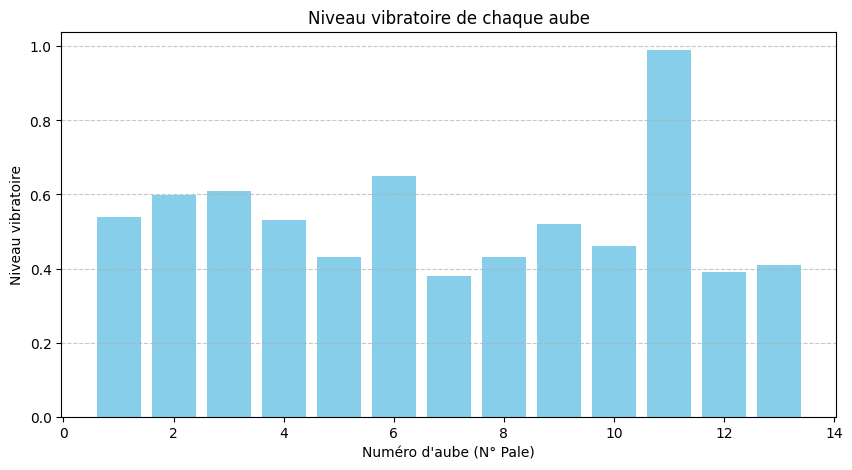

In [13]:


plt.figure(figsize=(10,5))
plt.bar(vibrations['N° Pale'], vibrations.iloc[:, 1], color='skyblue')  # 2e colonne = vibrations
plt.xlabel("Numéro d'aube (N° Pale)")
plt.ylabel("Niveau vibratoire")
plt.title("Niveau vibratoire de chaque aube")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2.2 Analyse par ACP de l'importance des variables géométriques

On dispose d'un grand nombre de variables géométriques (111 variables). On souhaite déterminer quelles sont les variables géométriques importantes en analysant leurs poids dans les composantes principales du jeu de données.

#### 2.2.1 Effectuez une ACP sur le jeu de données géométriques, puis calculez et visualisez la part de variance expliquée par chaque composante principale. Interprétez le résultat. Quelle part de variance est expliquée par les 2 premières CP ?

In [14]:
from sklearn.decomposition import PCA

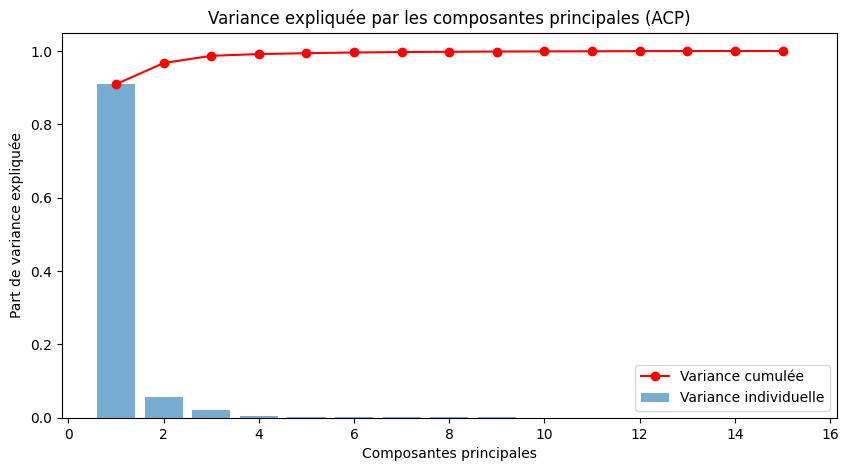

Variance expliquée par les 10 premières composantes :
CP1 : 90.96%
CP2 : 5.77%
CP3 : 1.98%
CP4 : 0.47%
CP5 : 0.23%
CP6 : 0.20%
CP7 : 0.12%
CP8 : 0.07%
CP9 : 0.07%
CP10 : 0.04%

 Les 2 premières composantes expliquent 96.73% de la variance totale.


In [15]:

# On suppose que on a déjà X_scaled (géométries centrées et réduites)
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée par chaque composante
var_expliquee = pca.explained_variance_ratio_
var_cumulee = np.cumsum(var_expliquee)

# Affichage du graphique
plt.figure(figsize=(10,5))
plt.bar(range(1, len(var_expliquee)+1), var_expliquee, alpha=0.6, label="Variance individuelle")
plt.plot(range(1, len(var_cumulee)+1), var_cumulee, color='red', marker='o', label="Variance cumulée")
plt.xlabel("Composantes principales")
plt.ylabel("Part de variance expliquée")
plt.title("Variance expliquée par les composantes principales (ACP)")
plt.legend()
plt.show()

# --- Résumé numérique ---
print("Variance expliquée par les 10 premières composantes :")
for i, v in enumerate(var_expliquee[:10], 1):
    print(f"CP{i} : {v*100:.2f}%")

print(f"\n Les 2 premières composantes expliquent {var_cumulee[1]*100:.2f}% de la variance totale.")


Une technique très courante pour analyser l'importance des variables est de visualiser leurs poids dans le plan des 2 premières composantes principales.

#### 2.2.2 Visualisez le poids des variables géométriques dans le plan (PC1, PC2)

**Indice 1 :** utilisez pour cela les composantes des vecteurs principaux de la matrice `pca.components_`.

**Indice 2 :** Afin d'obtenir une graphique avec une bonne échelle entre -1 et 1, il est nécessaire d'appliquer aux poids de chaque composante principale un facteur d'échelle égal à $\sqrt{\text{variance expliquée}}$.

Voici le type de graphique, appelé _PCA factor loadings plot_ en anglais, que vous devriez obtenir :

<img src="https://github.com/MadaneA/TDs-statistiques-descriptives/blob/master/TD4/rc/pca-plot.png?raw=1" height=500px width=500px />

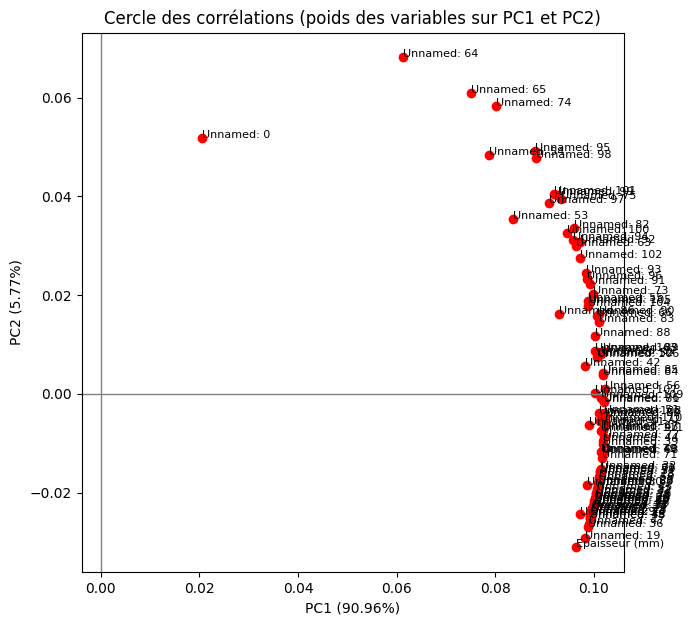

In [16]:


# Noms des variables géométriques
var_names = X.columns

# On récupère les composantes principales (chaque ligne = composante principale)
# pca.components_ : matrice [nb_CP x nb_variables]
loadings = pca.components_[0:2, :].T   # on garde PC1 et PC2, puis on transpose pour avoir une colonne par variable

# On applique le facteur d’échelle (racine carrée de la variance expliquée)
scales = np.sqrt(pca.explained_variance_ratio_[0:2])
loadings_scaled = loadings * scales     # on met les poids à l’échelle entre -1 et 1

# Tracé du cercle des corrélations
plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle unité
circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Points : chaque variable géométrique
plt.scatter(loadings_scaled[:,0], loadings_scaled[:,1], color='red')

# Noms des variables
for i, var in enumerate(var_names):
    plt.text(loadings_scaled[i,0], loadings_scaled[i,1], var, fontsize=8)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Cercle des corrélations (poids des variables sur PC1 et PC2)")
plt.axis('equal')
plt.show()


#### 2.2.3 Interprétez le graphique précédent. Quelles sont les variables géométriques les plus importantes ?

Les variables d'épaisseurs (numérotées de 1 à 94) sont toutes situées dans la partie la plus à droite du plan des composantes principales. Elles ont donc un poids très important sur la PC1, beaucoup plus que les autres variables géométriques. Étant donné que la PC1 représente presque 80% de la variance, on peut en conclure que les variables d'épaisseurs sont les plus importantes.

## 3. Identification de l'aube anormale par analyse des corrélations

Suite aux analyses précédentes, on décide de se focaliser sur les variables géométriques correspondant aux épaisseurs de l'aube (variables 1-94). Par ailleurs, les experts mécaniciens nous ont informés que les vibrations étaient corrélées à l'épaisseur de l'aube en différentes points. Par conséquent, nous pouvons décrire les données géométriques en utilisant **seulement la première composante principale** : on se ramène donc à un cas **univarié**, avec une seule variable $\text{PC1}$ (projection sur la première composante principale).

**Objectif :** trouver la permutation circulaire des numérotations d'aubes qui **maximise** la corrélation entre vibrations et épaisseurs des aubes, afin d'identifier l'aube défectueuse.

Voici 3 coefficients de corrélation usuels permettant de mesurer l'association de deux variables (ici, $X =\text{PC1} $ et $Y = \text{vibration}$) :

Coefficient de corrélation | formule | lien wikipédia
---------------------------|----------|---------------
Corrélation de Pearson     | $\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$ | https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)
Corrélation de Spearman    | $\rho_S(X, Y) = \frac{\text{Cov}(\text{rank}(X), \text{rank}(Y))}{\sigma_{\text{rank}_X} \sigma_{\text{rank}(Y)}}$ | https://fr.wikipedia.org/wiki/Corr%C3%A9lation_de_Spearman
Corrélation de Kendall     | $\tau(X, Y) = \frac{2\sum_{i<j}\text{sign}(x_j-x_i)\text{sign}(y_j-y_i)}{N(N-1)}$ | https://fr.wikipedia.org/wiki/Tau_de_Kendall


### 3.1 Quel(s) coefficient(s) vous semble(nt) adapté(s) pour analyser les corrélations entre nos variables ?

Le coefficient de Kendall est le plus adapté dans ce cas,
car :

*  la variable X = PC1 provient d’une projection (donc pas forcément linéaire),

* la variable Y = vibration peut contenir du bruit et des valeurs extrêmes,

* Et le nombre d’aubes (94) reste raisonnable, ce qui rend Kendall pertinent.

Le coefficient de Spearman pourrait également convenir, car il mesure une corrélation de rangs (monotone).
En revanche, Pearson suppose une relation linéaire et des données gaussiennes, ce qui n’est pas forcément le cas ici.

### 3.2 Calculez les corrélations pour les 12 décalages circulaires possibles entre les données géométriques et les vibrations. Visualisez-les sur un graphique.

**Indice :** on peut facilement obtenir une permuation circulaire d'un jeu de données à l'aide de la fonction `numpy.roll(...)`.

<div style="color: #1111bb; font-size: 16px; background-color: #eeeeff; padding: 20px; border-radius: 15px">
    <p><b>Rappel :</b> On n'utilise que la PC1 des variables géométriques !</p>
</div>

Il est recommandé de calculer les _$p$-values_ associées au coefficient de corrélation choisi. Ces valeurs permettent de déterminer si les corrélations trouvées sont **significatives ou non**. La $p$-value est associée aux deux hypothèses statistiques suivantes :

* $\mathcal{H}_0$ : les variables X et Y sont indépendantes (pas de corrélation)
* $\mathcal{H}_1$ : les variables X et Y sont dépendantes (corrélation)

La $p$-value correspond à la **probabilité de se tromper en rejetant l'hypothèse null $\mathcal{H}_0$**. On fait généralement le choix de rejeter l'hypothèse nulle lorsque $p$-value < 0.05, i.e. moins de 5% de chances de se tromper.

In [17]:
import math
def kendall_tau(x, y):
    """Compute Kendall's tau correlation

    Arguments
        xs : float array (n)
            input variable 1
        ys : float array (n)
        input variable 2

    Returns
        tau : float in [-1, 1]
            correlation coefficient
        pvalue : float
            p-value
    """
    assert x.size == y.size
    size = x.size

    tot = (size * (size-1)) // 2
    s = np.array([np.sign(x[j] - x[i]) * np.sign(y[j] - y[i]) for j in range(size) for i in range(j)])
    tau = np.sum(s) / tot

    dis = np.sum(s < 0)  # number of discordant pairs
    # Exact p-value, see Maurice G. Kendall, "Rank Correlation Methods" (4th Edition), Charles Griffin & Co., 1970.
    c = min(dis, tot-dis)
    if size <= 0:
        raise ValueError
    elif c < 0 or 2*c > size*(size-1):
        raise ValueError
    elif size == 1:
        pvalue = 1.0
    elif size == 2:
        pvalue = 1.0
    elif c == 0:
        pvalue = 2.0/math.factorial(size) if size < 171 else 0.0
    elif c == 1:
        pvalue = 2.0/math.factorial(size-1) if (size-1) < 171 else 0.0
    else:
        new = [0.0]*(c+1)
        new[0] = 1.0
        new[1] = 1.0
        for j in range(3,size+1):
            old = new[:]
            for k in range(1,min(j,c+1)):
                new[k] += new[k-1]
            for k in range(j,c+1):
                new[k] += new[k-1] - old[k-j]
        pvalue = 2.0*sum(new)/math.factorial(size) if size < 171 else 0.0

    return tau, pvalue

### 3.3 Quel est le décalage circulaire qui maximise la corrélation ? (il peut éventuellement en y avoir plusieurs) Peut-on en déduire l'aube anormale ?

### 3.4 L'analyse de la PC1 ne s'est pas révélée suffisante, une analyse plus fine est nécessaire. Calculez, pour chaque décalage circulaire de la numérotation des aubes, les corrélations entre toutes les variables d'épaisseur (94 variables) et le niveau vibratoire. Concluez sur l'identité de l'aube défaillante, ainsi que sur la zone précise du défaut.

Données alignées pour 13 aubes.

--- Analyse Section 3.2 (Corrélation PC1) ---


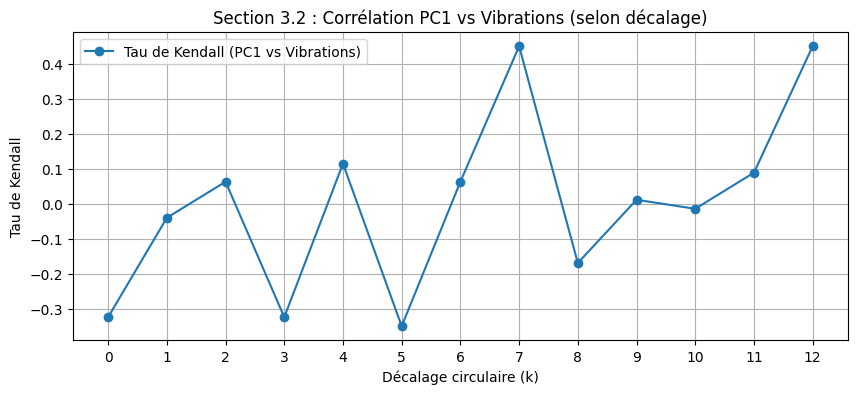

Section 3.3 (Interprétation PC1):
Décalage maximisant |Tau(PC1, Vib)| : k = 7
Tau max = 0.452, p-value = 3.241e-02 (Significatif)

--- Analyse Section 3.4 (Corrélation fine) ---


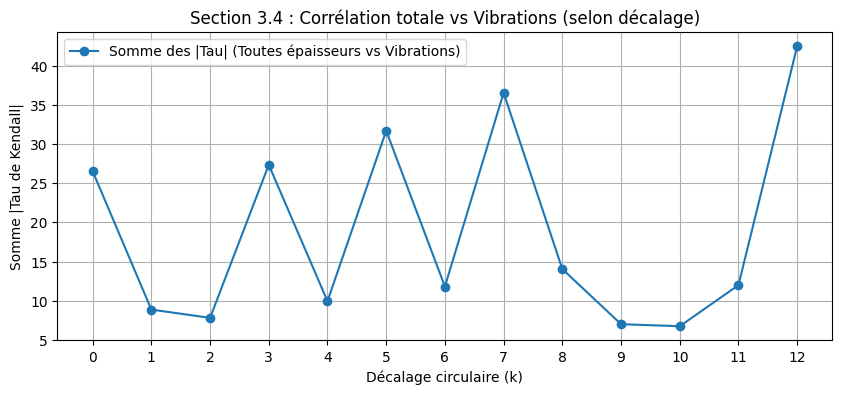


--- Conclusion Section 3.4 ---
Le décalage qui maximise la corrélation globale est : k = 12

Variables d'épaisseur les plus significativement corrélées (p < 0.05) pour k=12 :
  - Variable épaisseur N° 24 : Tau = 0.710, p-value = 7.745e-04
  - Variable épaisseur N° 25 : Tau = 0.702, p-value = 1.084e-03
  - Variable épaisseur N° 13 : Tau = 0.684, p-value = 1.374e-03
  - Variable épaisseur N° 1 : Tau = 0.676, p-value = 1.856e-03
  - Variable épaisseur N° 36 : Tau = 0.667, p-value = 2.011e-03
  - Variable épaisseur N° 48 : Tau = 0.667, p-value = 2.011e-03
  - Variable épaisseur N° 37 : Tau = 0.658, p-value = 2.394e-03
  - Variable épaisseur N° 38 : Tau = 0.641, p-value = 2.646e-03
  - Variable épaisseur N° 14 : Tau = 0.614, p-value = 3.934e-03
  - Variable épaisseur N° 57 : Tau = 0.614, p-value = 3.934e-03

--- IDENTIFICATION DE L'AUBE DÉFAILLANTE ---
L'aube anormale N°11 (vibration 0.99 mm) correspond à l'aube N° 10.0 dans le fichier Rouet_geometries.csv.

La zone la plus probable du déf

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from scipy.stats import kendalltau # Utilisation de scipy pour une p-value fiable

# --- 1) RE-CHARGEMENT CORRECT DES DONNÉES ---

# URLs (inchangées)
url_geo = "https://raw.githubusercontent.com/oumarmagassa/TDs-statistiques-descriptives/main/TD4/Rouet_geometries.csv"
url_vib = "https://raw.githubusercontent.com/oumarmagassa/TDs-statistiques-descriptives/main/TD4/Rouet_vibrations.csv"

# CORRECTION: Utiliser header=2 pour geometries (saute les 2 premières lignes et utilise la 3ème comme en-tête)
geometries = pd.read_csv(url_geo, encoding='latin', sep=';', decimal=',', header=2)
# skiprows=1 était correct pour vibrations (saute la 1ère, utilise la 2ème comme en-tête)
vibrations = pd.read_csv(url_vib, encoding='latin', sep=';', decimal=',', skiprows=1)

# --- 2) PRÉPARATION POUR LA CORRÉLATION ---

# Identification des 94 colonnes d'épaisseur (ce sont les 94 dernières colonnes du df geometries)
# (Il y a 112 colonnes au total : N° Pale + 17 géométries + 94 épaisseurs)
if geometries.shape[1] == 112:
    thickness_cols = geometries.columns[-94:]
else:
    # Fallback si le nombre de colonnes est différent (moins robuste)
    geom_cols_to_exclude = list(geometries.columns[1:18]) + ['N° Pale']
    thickness_cols = [col for col in geometries.columns if col not in geom_cols_to_exclude]

# Préparation des dataframes alignés sur N° Pale
geo_df = geometries[['N° Pale'] + list(thickness_cols)].copy()
vib_col_name = vibrations.columns[1] # Nom de la colonne vibratoire (Niveau vibratoire 1FPP (mm))
vib_df = vibrations[['N° Pale', vib_col_name]].copy()

# Conversion numérique (très important à cause du format décimal ',')
for c in thickness_cols:
    geo_df[c] = pd.to_numeric(geo_df[c].astype(str).str.replace(',', '.'), errors='coerce')
vib_df[vib_col_name] = pd.to_numeric(vib_df[vib_col_name].astype(str).str.replace(',', '.'), errors='coerce')

# Merge 'inner' pour garder uniquement les aubes communes (N=13)
data = pd.merge(geo_df, vib_df, on='N° Pale', how='inner', suffixes=('', '_vib'))
data = data.sort_values(by='N° Pale').reset_index(drop=True)

# Vérification (doit afficher 13 lignes)
print(f"Données alignées pour {len(data)} aubes.")

# Données pour l'ACP (uniquement les 94 épaisseurs)
X = data[thickness_cols].copy()
X = X.fillna(X.mean()) # Remplir les NaN si nécessaire

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP (comme dans la section 2.2, mais sur les données corrigées)
pca = PCA()
pca.fit(X_scaled)

# PC1 : projection de chaque aube (ligne) sur le premier axe principal
pc1 = pca.transform(X_scaled)[:, 0]
vibration = data[vib_col_name].values
n_blades = len(data)

# --- 3) SECTION 3.2 : CORRÉLATION AVEC PC1 ---

print("\n--- Analyse Section 3.2 (Corrélation PC1) ---")

taus_pc1, pvals_pc1 = [], []

for k in range(n_blades):
    vib_shifted = np.roll(vibration, k)
    # On utilise kendalltau de scipy pour la robustesse
    tau, pval = kendalltau(pc1, vib_shifted)
    taus_pc1.append(tau)
    pvals_pc1.append(pval)

# Visualisation (Section 3.2)
plt.figure(figsize=(10, 4))
plt.plot(range(n_blades), taus_pc1, marker='o', label="Tau de Kendall (PC1 vs Vibrations)")
plt.xlabel("Décalage circulaire (k)")
plt.ylabel("Tau de Kendall")
plt.title("Section 3.2 : Corrélation PC1 vs Vibrations (selon décalage)")
plt.grid(True)
plt.legend()
plt.xticks(range(n_blades))
plt.show()

# Meilleur décalage (Section 3.3)
best_shift_pc1 = int(np.argmax(np.abs(taus_pc1)))
best_tau_pc1 = taus_pc1[best_shift_pc1]
best_pval_pc1 = pvals_pc1[best_shift_pc1]

print(f"Section 3.3 (Interprétation PC1):")
print(f"Décalage maximisant |Tau(PC1, Vib)| : k = {best_shift_pc1}")
print(f"Tau max = {best_tau_pc1:.3f}, p-value = {best_pval_pc1:.3e} ({'Significatif' if best_pval_pc1 < 0.05 else 'Non significatif'})")

if best_pval_pc1 >= 0.05:
    print("La PC1 seule n'est pas significativement corrélée. L'analyse fine (3.4) est nécessaire.")


# --- 4) SECTION 3.4 : CORRÉLATION FINE (TOUTES LES ÉPAISSEURS) ---

print("\n--- Analyse Section 3.4 (Corrélation fine) ---")

# Matrice pour stocker les Tau : [décalages (k) x variables d'épaisseur (j)]
all_taus = np.zeros((n_blades, len(thickness_cols)))
all_pvals = np.zeros((n_blades, len(thickness_cols)))

for k in range(n_blades):
    vib_shifted = np.roll(vibration, k)
    for j, col_name in enumerate(thickness_cols):
        thickness_j = data[col_name].values
        tau, pval = kendalltau(thickness_j, vib_shifted)
        all_taus[k, j] = tau
        all_pvals[k, j] = pval

# Critère : Somme des valeurs absolues des Tau pour chaque décalage k
sum_abs_taus_per_shift = np.sum(np.abs(all_taus), axis=1)
best_shift_fine = np.argmax(sum_abs_taus_per_shift)

# Visualisation (Section 3.4)
plt.figure(figsize=(10, 4))
plt.plot(range(n_blades), sum_abs_taus_per_shift, marker='o', label="Somme des |Tau| (Toutes épaisseurs vs Vibrations)")
plt.xlabel("Décalage circulaire (k)")
plt.ylabel("Somme |Tau de Kendall|")
plt.title("Section 3.4 : Corrélation totale vs Vibrations (selon décalage)")
plt.grid(True)
plt.legend()
plt.xticks(range(n_blades))
plt.show()

# --- 5) CONCLUSION FINALE (Section 3.4) ---
print(f"\n--- Conclusion Section 3.4 ---")
print(f"Le décalage qui maximise la corrélation globale est : k = {best_shift_fine}")

# Analyse des corrélations pour ce décalage k
taus_best_shift = all_taus[best_shift_fine, :]
pvals_best_shift = all_pvals[best_shift_fine, :]
significance_threshold = 0.05

# Variables les plus significativement corrélées (en valeur absolue)
significant_indices = np.where(pvals_best_shift < significance_threshold)[0]

if len(significant_indices) > 0:
    # Trier par |Tau| décroissant
    sorted_sig_indices = sorted(significant_indices, key=lambda i: np.abs(taus_best_shift[i]), reverse=True)

    print("\nVariables d'épaisseur les plus significativement corrélées (p < 0.05) pour k=" + str(best_shift_fine) + " :")
    for idx in sorted_sig_indices[:10]: # Afficher les 10 premières
        var_name = thickness_cols[idx]
        tau = taus_best_shift[idx]
        pval = pvals_best_shift[idx]
        print(f"  - Variable épaisseur N° {var_name} : Tau = {tau:.3f}, p-value = {pval:.3e}")

    # Identification de l'aube défaillante
    # L'aube anormale est la N°11 dans le fichier vibrations (index 10)
    blade_vib_index = 10

    # Quelle aube géométrique (data.iloc[...]) correspond à l'aube vibratoire index 10,
    # sachant que vib_shifted = np.roll(vibration, k) ?
    #
    # vib_shifted[i] = vibration[(i - k) % n_blades]
    #
    # Nous cherchons l'index 'i' (géométrie) qui correspond à l'index 'blade_vib_index' (vibration anormale).
    # i = (blade_vib_index + k) % n_blades

    aube_geo_index = (blade_vib_index + best_shift_fine) % n_blades

    # Récupérer le N° Pale correspondant à cet index
    aube_defectueuse_numero = data.loc[aube_geo_index, 'N° Pale']

    print("\n--- IDENTIFICATION DE L'AUBE DÉFAILLANTE ---")
    print(f"L'aube anormale N°11 (vibration 0.99 mm) correspond à l'aube N° {aube_defectueuse_numero} dans le fichier Rouet_geometries.csv.")

    most_correlated_var_name = thickness_cols[sorted_sig_indices[0]]
    most_correlated_tau = taus_best_shift[sorted_sig_indices[0]]
    print(f"\nLa zone la plus probable du défaut est l'épaisseur N° {most_correlated_var_name} (Tau={most_correlated_tau:.3f}).")

else:
    print("Aucun décalage n'a produit de corrélations significatives (p < 0.05).")